# Largest Product in a Grid

In the 20×20 grid below, four numbers along a diagonal line have been marked in red.

```
08 02 22 97 38 15 00 40 00 75 04 05 07 78 52 12 50 77 91 08
49 49 99 40 17 81 18 57 60 87 17 40 98 43 69 48 04 56 62 00
81 49 31 73 55 79 14 29 93 71 40 67 53 88 30 03 49 13 36 65
52 70 95 23 04 60 11 42 69 24 68 56 01 32 56 71 37 02 36 91
22 31 16 71 51 67 63 89 41 92 36 54 22 40 40 28 66 33 13 80
24 47 32 60 99 03 45 02 44 75 33 53 78 36 84 20 35 17 12 50
32 98 81 28 64 23 67 10 26 38 40 67 59 54 70 66 18 38 64 70
67 26 20 68 02 62 12 20 95 63 94 39 63 08 40 91 66 49 94 21
24 55 58 05 66 73 99 26 97 17 78 78 96 83 14 88 34 89 63 72
21 36 23 09 75 00 76 44 20 45 35 14 00 61 33 97 34 31 33 95
78 17 53 28 22 75 31 67 15 94 03 80 04 62 16 14 09 53 56 92
16 39 05 42 96 35 31 47 55 58 88 24 00 17 54 24 36 29 85 57
86 56 00 48 35 71 89 07 05 44 44 37 44 60 21 58 51 54 17 58
19 80 81 68 05 94 47 69 28 73 92 13 86 52 17 77 04 89 55 40
04 52 08 83 97 35 99 16 07 97 57 32 16 26 26 79 33 27 98 66
88 36 68 87 57 62 20 72 03 46 33 67 46 55 12 32 63 93 53 69
04 42 16 73 38 25 39 11 24 94 72 18 08 46 29 32 40 62 76 36
20 69 36 41 72 30 23 88 34 62 99 69 82 67 59 85 74 04 36 16
20 73 35 29 78 31 90 01 74 31 49 71 48 86 81 16 23 57 05 54
01 70 54 71 83 51 54 69 16 92 33 48 61 43 52 01 89 19 67 48
```

The product of these numbers is 26 × 63 × 78 × 14 = 1788696.

What is the greatest product of four adjacent numbers in the same direction (up, down, left, right, or diagonally) in the 20×20 grid?


## Common Code
Before we tackle the problem, we should create some functions and constants that we will use throughout the exercise.

In [23]:
from typing import List


raw_grid: str = """
08 02 22 97 38 15 00 40 00 75 04 05 07 78 52 12 50 77 91 08
49 49 99 40 17 81 18 57 60 87 17 40 98 43 69 48 04 56 62 00
81 49 31 73 55 79 14 29 93 71 40 67 53 88 30 03 49 13 36 65
52 70 95 23 04 60 11 42 69 24 68 56 01 32 56 71 37 02 36 91
22 31 16 71 51 67 63 89 41 92 36 54 22 40 40 28 66 33 13 80
24 47 32 60 99 03 45 02 44 75 33 53 78 36 84 20 35 17 12 50
32 98 81 28 64 23 67 10 26 38 40 67 59 54 70 66 18 38 64 70
67 26 20 68 02 62 12 20 95 63 94 39 63 08 40 91 66 49 94 21
24 55 58 05 66 73 99 26 97 17 78 78 96 83 14 88 34 89 63 72
21 36 23 09 75 00 76 44 20 45 35 14 00 61 33 97 34 31 33 95
78 17 53 28 22 75 31 67 15 94 03 80 04 62 16 14 09 53 56 92
16 39 05 42 96 35 31 47 55 58 88 24 00 17 54 24 36 29 85 57
86 56 00 48 35 71 89 07 05 44 44 37 44 60 21 58 51 54 17 58
19 80 81 68 05 94 47 69 28 73 92 13 86 52 17 77 04 89 55 40
04 52 08 83 97 35 99 16 07 97 57 32 16 26 26 79 33 27 98 66
88 36 68 87 57 62 20 72 03 46 33 67 46 55 12 32 63 93 53 69
04 42 16 73 38 25 39 11 24 94 72 18 08 46 29 32 40 62 76 36
20 69 36 41 72 30 23 88 34 62 99 69 82 67 59 85 74 04 36 16
20 73 35 29 78 31 90 01 74 31 49 71 48 86 81 16 23 57 05 54
01 70 54 71 83 51 54 69 16 92 33 48 61 43 52 01 89 19 67 48
"""
PARSED_GRID: List[List[int]] = [[int(item) for item in line.split(' ')] for line in raw_grid.split('\n') if line]
LARGE_GRID: List[List[int]] 

with open('./data/pe11_large_grid', mode='r') as file:
    LARGE_GRID = [[int(item) for item in line.strip().split(' ')] for line in file.readlines()]


def get_diagonals(grid: List[List[int]]) -> List[List[int]]:
    """
    gets all the diagonals of a grid

    :param grid: 2d grid of integers
    :returns: list of diagonals
    """
    diagonals: List[List[int]] = [[] for _ in range((len(grid[0]) + len(grid) - 1) * 2)]

    for i in range(len(grid)):

        for j in range(len(grid[0])):
            diagonals[i + j].insert(0, grid[i][j])
            diagonals[len(grid) - i + j - 1 + (len(grid[0]) + len(grid) - 1)].insert(0, grid[i][j])

    return diagonals

## Solution One - Brute Force
The simplest way to solve this problem is to try all possible products in all the rows, columns and valid diagonals of the grid.

In [24]:
from utils.timing import timed


@timed(1)
def solution_one(grid: List[List[int]] = PARSED_GRID, size: int = 4) -> int:
    """
    returns the largest size sized product of adjecent numbers in the grid

    :param grid: 2d grid of integers
    :param size: size of the product
    :returns: largest size sized product of adjecent numbers
    """
    possibilities: List[List[int]] = [[grid[i][j] for i in range(len(grid))] for j in range(len(grid[0]))]
    possibilities.extend([diagonal for diagonal in get_diagonals(grid) if len(diagonal) >= size])
    possibilities.extend(grid)
    answer: int = 0

    for series in possibilities:

        for i in range(len(series) - size + 1):
            product: int = 1

            for j in range(size):
                product *= series[j + i]

            answer = product if product > answer else answer
  
    return answer

answer, time_elapsed = solution_one()
print(f'The answer is: {answer}\nThat took: {time_elapsed}')

The answer is: 70600674
That took: 0.001246279996848898


### Solution One Discussion
Solution one is already not that far from the best possible one since we will always have to check all numbers in the grid. However, similar to problem 8, it seems it seems wasteful not to use previous results since only one number changes for each step.

## Solution Two - Using Previous Products and Skipping Zeros
To avoid having to re-multiply similar numbers, we can store previous results and use them to generate the next one. Moreover, once we find a zero, we can skip it since all sequences containing it would also result in zero.

In [25]:
from utils.timing import timed
from typing import Union, List


@timed(1)
def solution_two(grid: List[List[int]] = PARSED_GRID, size: int = 4) -> int:
    """
    returns the largest size sized product of adjecent numbers in the grid

    :param grid: 2d grid of integers
    :param size: size of the product
    :returns: largest size sized product of adjecent numbers
    """
    possibilities: List[List[int]] = [[grid[i][j] for i in range(len(grid))] for j in range(len(grid[0]))]
    possibilities.extend([diagonal for diagonal in get_diagonals(grid) if len(diagonal) >= size])
    possibilities.extend(grid)
    answer: int = 0

    for series in possibilities:
        start: int = 0
        previous_product: Union[int, None] = None

        while start < len(series) - size + 1:

            # == use previous product == #
            
            if previous_product and series[start - 1]:    
                previous_product //= series[start - 1]     # divide by previous start
                previous_product *= series[start + size - 1]  # multiply by new number

                if not series[start + size - 1]:   # skip zero
                    previous_product = None
                    start = start + size - 1

            # == generate fresh product == #

            else:
                previous_product: int = 1

                for i in range(size):
                    previous_product *= series[start + i]

                    if not series[start + i]:   # skip zero
                        previous_product = None
                        start = start + i
                        break

            answer = previous_product if previous_product and previous_product > answer else answer

            start += 1
        
    return answer

answer, time_elapsed = solution_two()
print(f'The answer is: {answer}\nThat took: {time_elapsed}')

The answer is: 70600674
That took: 0.0005768869996245485


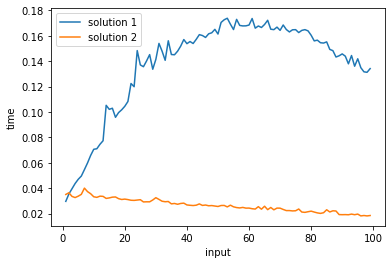

In [26]:
from utils.plotting import plot_range

params = tuple((LARGE_GRID, i) for i in range(1, 161))
plot_range(params, (solution_one, solution_two), x_axis_labeling_function=lambda i: i[1])